# Import dependencies
Cleaning utils is a module based on the work from cleaning the data (cleaning.ipynb).

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import pandas as pd
import os
from cleaning_utils import *
import numpy as np
from wordcloud import WordCloud
from wordcloud import ImageColorGenerator
import matplotlib.pyplot as plt
from PIL import Image
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# Execute cleaning data function and prepare data for visualizations.

- Function 'clean_mikes_data' cleans columns that need cleaning.
- Function 'split_rows' takes a dataframe and split by a delimeter='|' to return a new data frame with cells split and stacked vertically

In [3]:
cwd = os.getcwd()
df = pd.read_csv(os.path.join(cwd, "MetObjects.txt"), low_memory=False)

artist_col_list = list(range(16, 28))
artist_col_list.insert(0, 0)
artist_df = df.iloc[: , artist_col_list]
artist_df = split_rows(artist_df)
artist_df["Artist End Date_clean"] = artist_df["Artist End Date"].str.extract("(-?\d\d\d\d)")
date_series = artist_df['Artist End Date_clean'].dropna()
date_series = pd.to_numeric(date_series)
df = df.astype(str, errors="ignore")
df = clean_mikes_data(df)

# Prepare 'region' data for Wordcloud

- Concatonate words from all of the different 'region' type of columns.
- Filter out 'nan' otherwise it would be the biggest word

In [4]:
regional_text_list = []
for col in ['City', 'State', 'County', 'Country', 'Region', 'Subregion', 'Locale', 'Locus']:
    regional_text_list.extend(df[col].tolist())

regional_text = ""
for text in regional_text_list:
    text = str(text)
    if text != 'nan':
        regional_text = regional_text + " " + text

# Plot Wordcloud

- wordcloud plotted using **wordcloud** which allows you to specify an image of which your wordcloud will take shape.
- This wordcloud represents the regions from which the art in the MET comes from. 

findfont: Font family ['Times New Roman Bold'] not found. Falling back to DejaVu Sans.


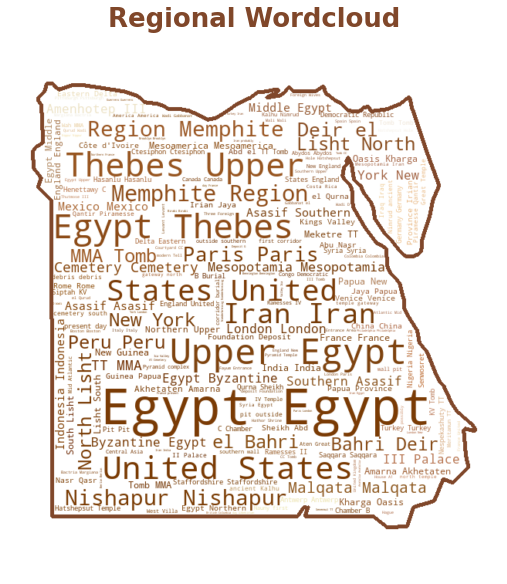

In [5]:
egypt_mask = np.array(Image.open('egypt.png'))

eqypt_colors = ImageColorGenerator(np.array(Image.open('egypt_colors.jpg')))
wc = WordCloud(mask=egypt_mask, background_color="white",contour_color='#80472a',contour_width=5, width=1280, height=1410, color_func=eqypt_colors)
wc.generate(regional_text)
plt.figure( figsize=(20,10) )
plt.title("Regional Wordcloud", color='#80472a', fontdict={'fontsize': 26, 'weight': 'heavy'}, fontname="Times New Roman Bold")
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

# Plot Department sizes

- Plot department size by how many artworks are in each department

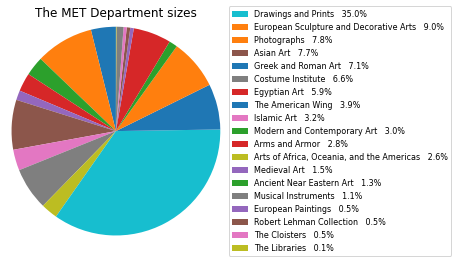

In [6]:
rowu = list(df.Department.unique())
sizes = [df[df["Department"]== u].shape[0] for u in rowu]
total = sum(sizes)
porcent = [round(size*100/total, 1) for size in sizes]
labels = [f"{u}   {s}%" for u, s in zip(rowu, porcent)]

fig, ax = plt.subplots(facecolor='white')

patches, texts = ax.pie(sizes, startangle=90, radius=1.2)
patches, labels, dummy =  zip(*sorted(zip(patches, labels, sizes),
                                          key=lambda x: x[2],
                                          reverse=True))

plt.legend(patches, labels, loc='center left', bbox_to_anchor=(1, 0.5),
           fontsize=8)
plt.title("The MET Department sizes")
plt.show()

# Plot distribution of artist timeperiods

- Clean data of nan, change dtype, eliminate 9999 as nan
- Plot on linear scale as well as log scale so you can see lesser counts of older artists

<AxesSubplot:title={'center':'Log y scale'}, xlabel='Year', ylabel='Count'>

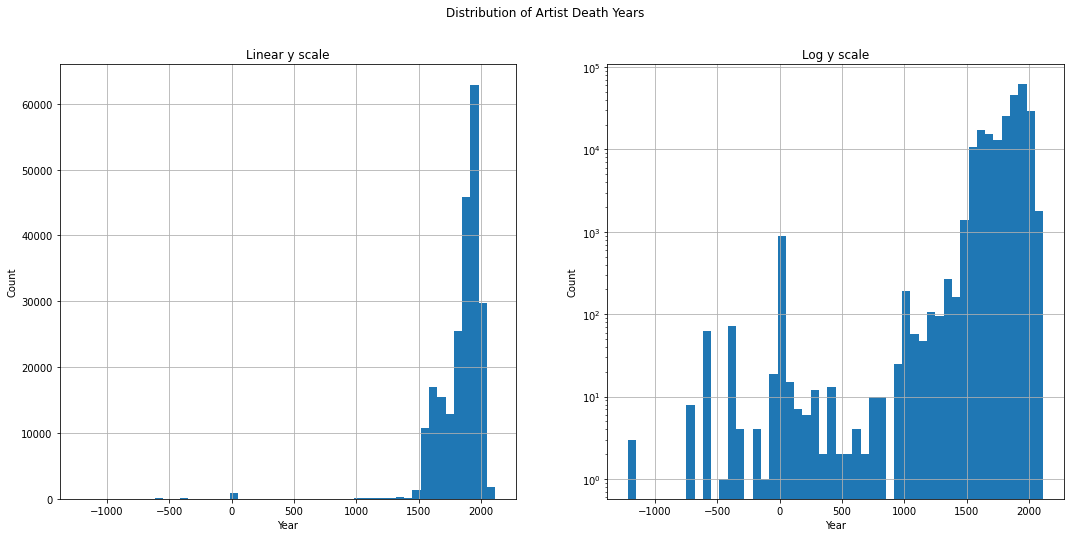

In [9]:
date_series = df['Artist End Date_clean'].dropna()
date_series = pd.to_numeric(date_series)
date_series = date_series[date_series!=9999]
date_series = date_series[date_series<2500]

fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2)
fig.set_size_inches(18, 8)
fig.suptitle("Distribution of Artist Death Years")
ax1.set_title('Linear y scale')
ax1.set_ylabel("Count")
ax1.set_xlabel("Year")
date_series.hist(bins=50, ax=ax1)
ax2.set_xlabel("Year")
ax2.set_ylabel("Count")
ax2.set_title('Log y scale')
ax2.set_yscale('log')
date_series.hist(bins=50, ax=ax2)

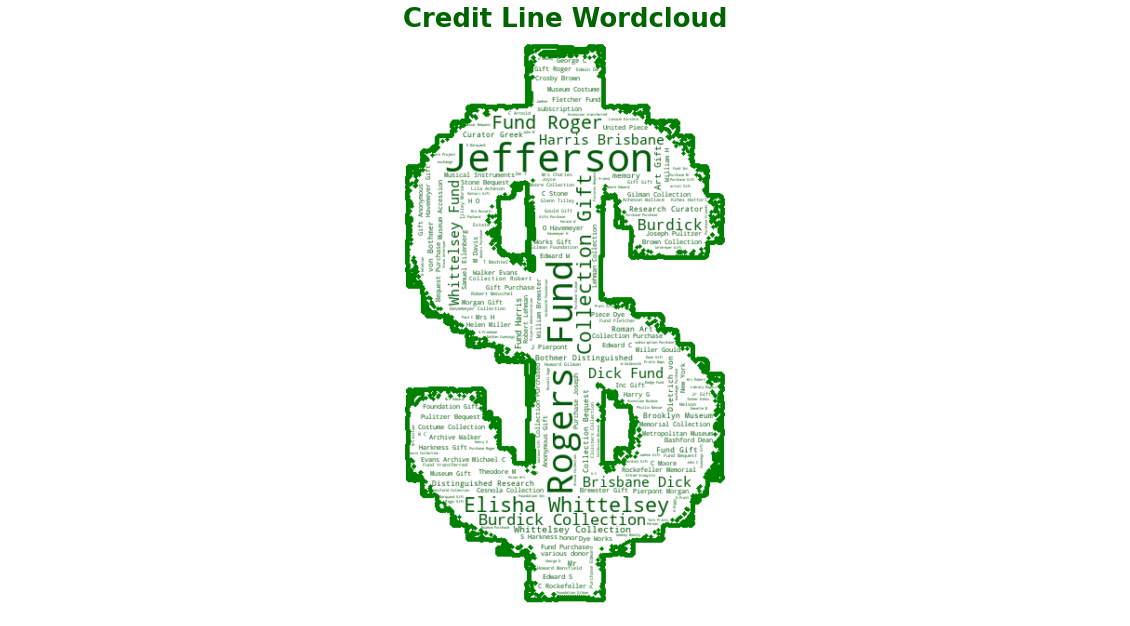

In [8]:

dollar_mask = np.array(Image.open('dollar_sign.jpg'))

green_colors = ImageColorGenerator(np.array(Image.open('green.jpg')))
wc = WordCloud(mask=dollar_mask, background_color="white",contour_color='green',contour_width=5, width=1280, height=1410, color_func=green_colors)
wc.generate(' '.join(df['Credit Line'].tolist()))
plt.figure(figsize=(20,20))
plt.title("Credit Line Wordcloud", color='darkgreen', fontdict={'fontsize': 26, 'weight': 'heavy'}, fontname="Times New Roman Bold")
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()